## Import libs

In [1]:
import pandas as pd
from tensorflow.keras.optimizers import Adam
from tensorflow.data import Dataset
import seaborn as sns


from models.unfair_lr.models import UnfairLogisticRegression
from models.unfair_lr.learning import train_loop
from util.evaluation import *
from util.load_data import load_data

## Preliminaries

In [2]:
batch_size = 64
epochs = 100
lr = 0.001
opt = Adam(learning_rate=lr)

In [3]:
header = "model_name", "clas_acc", "dp", "deqodds", "deqopp", "trade_dp", "trade_deqodds", "trade_deqopp"
results = []

test_loop = 1

## Load data

In [4]:
data_name = 'adult-race'

In [5]:
x_train, y_train, a_train = load_data(data_name, 'train')
raw_data = (x_train, y_train, a_train)

In [6]:
xdim = x_train.shape[1]
ydim = y_train.shape[1]
adim = a_train.shape[1]
zdim = 8

In [7]:
train_data = Dataset.from_tensor_slices((x_train, y_train, a_train))
train_data = train_data.batch(batch_size, drop_remainder=True)
train_data

<BatchDataset shapes: ((64, 112), (64, 1), (64, 5)), types: (tf.float64, tf.float64, tf.float64)>

In [8]:
x_valid, y_valid, a_valid = load_data(data_name, 'valid')

valid_data = Dataset.from_tensor_slices((x_valid, y_valid, a_valid))
valid_data = valid_data.batch(batch_size, drop_remainder=True)

In [9]:
x_test, y_test, a_test = load_data(data_name, 'test')

test_data = Dataset.from_tensor_slices((x_test, y_test, a_test))
test_data = test_data.batch(batch_size, drop_remainder=True)

## Testing

In [10]:
for i in range(test_loop):

    model = UnfairLogisticRegression(xdim, batch_size)
    ret = train_loop(model, train_data, epochs)
    Y, A, Y_hat = evaluation(model, valid_data)
    
    clas_acc, dp, deqodds, deqopp, confusion_matrix  = compute_metrics(Y, A, Y_hat, adim=adim)
    
    fair_metrics = (dp, deqodds, deqopp)
    
    tradeoff = []
    
    for fair_metric in fair_metrics:
        tradeoff.append(compute_tradeoff(clas_acc, fair_metric))
    
    result = ['UnfairLR-decay', clas_acc, dp, deqodds, deqopp, tradeoff[0], tradeoff[1], tradeoff[2]]

    results.append(result)

> Epoch | Class Loss | Class Acc
> 1 | 0.5871778726577759 | 0.5937085543766578
> 2 | 0.5375271439552307 | 0.7774370026525199
> 3 | 0.5096381306648254 | 0.8061588196286472
> 4 | 0.49505504965782166 | 0.8183023872679045
> 5 | 0.4866766929626465 | 0.8220324933687002
> 6 | 0.48134711384773254 | 0.8242291114058355
> 7 | 0.4776816666126251 | 0.8257211538461539
> 8 | 0.4750114381313324 | 0.8269645225464191
> 9 | 0.47298145294189453 | 0.8276276525198939
> 10 | 0.4713868498802185 | 0.827876326259947
> 11 | 0.470101922750473 | 0.828373673740053
> 12 | 0.46904456615448 | 0.8285809018567639
> 13 | 0.4681593179702759 | 0.8291196949602122
> 14 | 0.4674074947834015 | 0.8294098143236074
> 15 | 0.46676117181777954 | 0.8295341511936339
> 16 | 0.46619969606399536 | 0.829782824933687
> 17 | 0.4657074511051178 | 0.8301143899204244
> 18 | 0.46527254581451416 | 0.8299900530503979
> 19 | 0.46488553285598755 | 0.8299071618037135
> 20 | 0.4645388424396515 | 0.8301143899204244
> 21 | 0.4642268121242523 | 0.83028

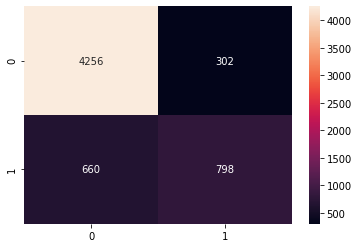

In [11]:
sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [12]:
for i in range(test_loop):
    opt = Adam(learning_rate=lr)

    model = UnfairLogisticRegression(xdim, batch_size)
    ret = train_loop(model, train_data, epochs, opt)
    Y, A, Y_hat = evaluation(model, valid_data)
    
    clas_acc, dp, deqodds, deqopp, confusion_matrix  = compute_metrics(Y, A, Y_hat, adim=adim)
    
    fair_metrics = (dp, deqodds, deqopp)
    
    tradeoff = []
    
    for fair_metric in fair_metrics:
        tradeoff.append(compute_tradeoff(clas_acc, fair_metric))
    
    result = ['UnfairLR', clas_acc, dp, deqodds, deqopp, tradeoff[0], tradeoff[1], tradeoff[2]]

    results.append(result)

> Epoch | Class Loss | Class Acc
> 1 | 0.5871778726577759 | 0.5937085543766578
> 2 | 0.5171973705291748 | 0.7916942970822282
> 3 | 0.4863579571247101 | 0.8203332228116711
> 4 | 0.472371369600296 | 0.8266329575596817
> 5 | 0.46499741077423096 | 0.8289539124668435
> 6 | 0.46076521277427673 | 0.8316893236074271
> 7 | 0.45835617184638977 | 0.8334300397877984
> 8 | 0.45716285705566406 | 0.8346319628647215
> 9 | 0.4568311274051666 | 0.8363726790450928
> 10 | 0.45710963010787964 | 0.837574602122016
> 11 | 0.45780259370803833 | 0.8386936339522546
> 12 | 0.4587545394897461 | 0.8394396551724138
> 13 | 0.4598451852798462 | 0.8398955570291777
> 14 | 0.4609850347042084 | 0.8403929045092838
> 15 | 0.46211177110671997 | 0.8412218169761273
> 16 | 0.4631843864917755 | 0.8418020557029178
> 17 | 0.4641783833503723 | 0.8424651856763926
> 18 | 0.4650811553001404 | 0.8427553050397878
> 19 | 0.4658880829811096 | 0.8431697612732095
> 20 | 0.46659958362579346 | 0.8433355437665783
> 21 | 0.46721944212913513 | 0

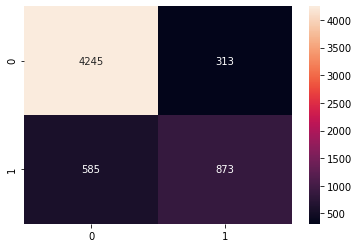

In [13]:
sns.heatmap(confusion_matrix, annot=True, fmt='g')

## Saving into DF then CSV

In [14]:
result_df = pd.DataFrame(results, columns=header)
result_df

,model_name,clas_acc,dp,deqodds,deqopp,trade_dp,trade_deqodds,trade_deqopp
0,UnfairLR-decay,0.840093,0.327755,0.784049,0.639182,0.471542,0.811104,0.725994
1,UnfairLR,0.850731,0.139176,0.678712,0.411715,0.239218,0.755048,0.554890


In [16]:
result_df.to_csv(f'{data_name}-result/unfair_lr-{epochs}.csv')